![logo](1_bDwEvCRgrKVbLrAXEixpfA.png)
___

##### import libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline 
sns.set(color_codes=True)

import functools as ft

#natural language processing
#pip install nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vlad_\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Step 3 - Analysis I: NLP with outlier removal
    a) Importing data
    
    b) Success-percentage column
        - check for outliers
        
    c) Checking for other outliers
        i) goals
       ii) converted_pledged_cmount
      iii) backers_count
        
    d) Natural Language Processing
        - cleaning blurb variable
            - punctuation
            - stopwords
            - lemmatization
        - writing and saving corpus

### a) Importing data
##### Use 'cleaned_data.csv' to begin cleaning

In [69]:
#import .csv file
cleaned_df = pd.read_csv("cleaned_data.csv")

cleaned_df.drop(['Unnamed: 0'], axis=1, inplace=True)

print(cleaned_df.shape)
cleaned_df.head(1)

(149563, 21)


,id,name,genre,subgenre,category,source_url,blurb,slug,goal,converted_pledged_amount,...,launched_at,deadline,country,currency,backers_count,disable_communication,is_starrable,spotlight,staff_pick,state
0,498799566,"Strange Wit, an original graphic novel about J...",Graphic Novels,comics,"{""id"":252,""name"":""Graphic Novels"",""slug"":""comi...",https://www.kickstarter.com/discover/categorie...,"The true biography of the historical figure, w...",strange-wit-an-original-graphic-novel-about-ja...,12000,14740,...,2015-08-15 04:19:27,2015-09-14 04:19:27,US,USD,403,0,0,1,1,successful


##### Counts for 'state' column

In [70]:
print(cleaned_df['state'].value_counts())

successful    93849
failed        55714
Name: state, dtype: int64


In our data, we have a good proportion of failed:successful campaigns so the steps below will explore these numbers in more detail in an attempt to filter our data. After countless iterations, I have decided that the most optimum range of outliers to remove are the bottom and top 10%. By creating the following success-percentage column, I will show this outlier removal and subsequent filtering as well as look at the other quantitative columns and their potential outliers.

### b) Success-Percentage Column
Make a new column for success % (pledged amount / goal amount)

In [71]:
#create column
cleaned_df['success_percentage']=(cleaned_df['converted_pledged_amount'] / cleaned_df['goal']) * 100

In [72]:
#finding the missing and infinite values
print('null:', cleaned_df['success_percentage'].isnull().sum())
print('na:', cleaned_df['success_percentage'].isna().sum())
print('\n')
print('inf:', np.isinf(cleaned_df["success_percentage"]).value_counts())

null: 0
na: 0


inf: False    149562
True          1
Name: success_percentage, dtype: int64


In [73]:
#locate the row in which the inf value is present (last column == 'inf')
print(cleaned_df.index[np.isinf(cleaned_df['success_percentage'])])
print('\n')
print('Row 118304 "success_percentage" value:', cleaned_df['success_percentage'].iloc[118304])

Int64Index([118304], dtype='int64')


Row 118304 "success_percentage" value: inf


In [74]:
#drop the row with inf value
cleaned_df.drop(cleaned_df.index[118304], inplace=True)

#reset index
cleaned_df.reset_index(drop=True,inplace=True)

## total number of rows and columns
print('dataframe shape: ', cleaned_df.shape)

dataframe shape:  (149562, 22)


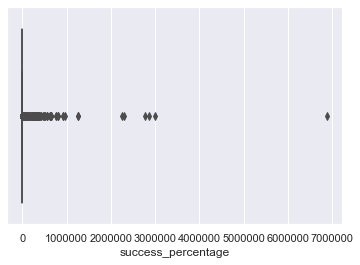

In [75]:
#make a boxplot of 'success_percentage' column
sns.boxplot(x=cleaned_df['success_percentage'])

In [77]:
#find 10% and 90% quartile values
cleaned_df.success_percentage.quantile(0.90)
cleaned_df.success_percentage.quantile(0.10)

#filter data based on quartile value
cleaned_df = cleaned_df[cleaned_df.success_percentage < 246.4]
cleaned_df = cleaned_df[cleaned_df.success_percentage > 0.021]

print('Length of dataframe without 10% outliers:', len(cleaned_df['success_percentage']))

Length of dataframe without 10% outliers: 119643


In [82]:
#check range of data
print(cleaned_df['state'].value_counts())

successful    78888
failed        40755
Name: state, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000198A8FECCC8>]],
      dtype=object)

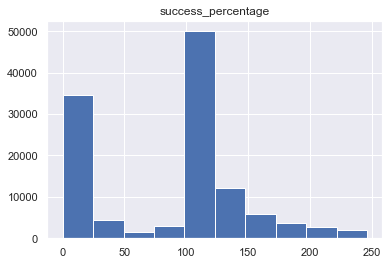

In [83]:
cleaned_df.hist(column='success_percentage')

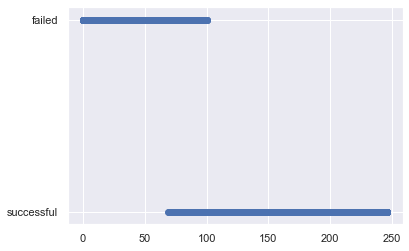

In [84]:
y = cleaned_df['state']
x = cleaned_df['success_percentage']

plt.scatter(x, y)
plt.show()

Our boxplot is starting to look more like a box now.


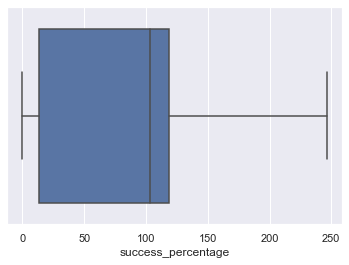

In [85]:
sns.boxplot(x=cleaned_df['success_percentage'])
print('Our boxplot is starting to look more like a box now.')

In [307]:
print(cleaned_df['state'].value_counts())

successful    5998
failed        4064
Name: state, dtype: int64


### c) Checking for other outliers

##### i) converted pledged amount

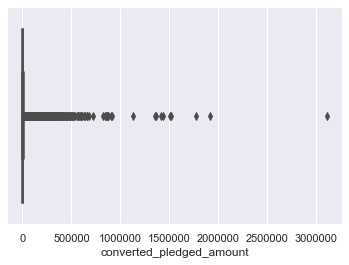

In [86]:
sns.boxplot(x=cleaned_df['converted_pledged_amount'])

In [87]:
#find 10% and 90% quartile values
a = cleaned_df.converted_pledged_amount.quantile(0.90)
b = cleaned_df.converted_pledged_amount.quantile(0.10)

#filter data based on quartile value
cleaned_df = cleaned_df[cleaned_df.converted_pledged_amount < a]
cleaned_df = cleaned_df[cleaned_df.converted_pledged_amount > b]

print('Length of dataframe without 10% outliers:', len(cleaned_df['converted_pledged_amount']))

Length of dataframe without 10% outliers: 95200


In [94]:
#check range of data
print(cleaned_df['state'].value_counts())

successful    67108
failed        28092
Name: state, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000198A8FF4448>]],
      dtype=object)

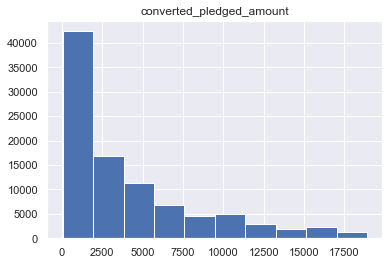

In [95]:
cleaned_df.hist(column='converted_pledged_amount')

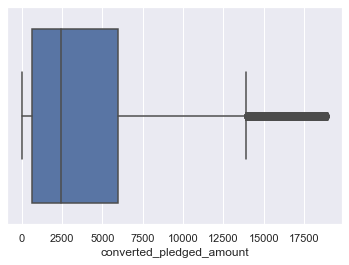

In [97]:
sns.boxplot(x=cleaned_df['converted_pledged_amount'])

##### ii) backers count

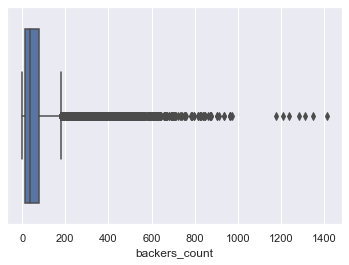

In [98]:
sns.boxplot(x=cleaned_df['backers_count'])

In [99]:
#find 10% and 90% quartile values
a = cleaned_df.converted_pledged_amount.quantile(0.90)
b = cleaned_df.converted_pledged_amount.quantile(0.10)

In [100]:
#filter data based on quartile value
cleaned_df = cleaned_df[cleaned_df.converted_pledged_amount < a]
cleaned_df = cleaned_df[cleaned_df.converted_pledged_amount > b]

print('Length of dataframe without 10% outliers:', len(cleaned_df['converted_pledged_amount']))

Length of dataframe without 10% outliers: 76124


In [101]:
#check range of data
print(cleaned_df['state'].value_counts())

successful    57336
failed        18788
Name: state, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000198AD242148>]],
      dtype=object)

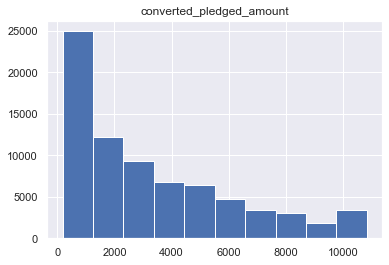

In [102]:
cleaned_df.hist(column='converted_pledged_amount')

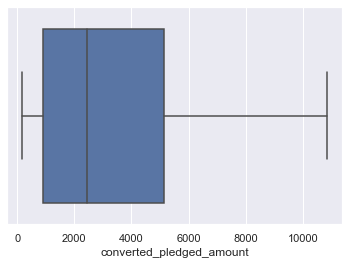

In [104]:
sns.boxplot(x=cleaned_df['converted_pledged_amount'])

##### iii) goal

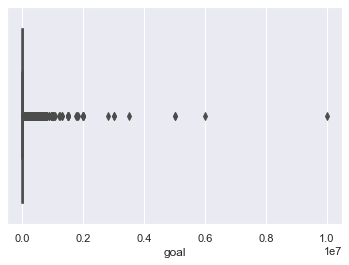

In [105]:
sns.boxplot(x=cleaned_df['goal'])

In [106]:
#find 10% and 90% quartile values
a = cleaned_df.converted_pledged_amount.quantile(0.90)
b = cleaned_df.converted_pledged_amount.quantile(0.10)

In [107]:
#filter data based on quartile value
cleaned_df = cleaned_df[cleaned_df.converted_pledged_amount < a]
cleaned_df = cleaned_df[cleaned_df.converted_pledged_amount > b]

print('Length of dataframe without 10% outliers:', len(cleaned_df['converted_pledged_amount']))

Length of dataframe without 10% outliers: 60841


In [108]:
#check range of data
print(cleaned_df['state'].value_counts())

successful    47886
failed        12955
Name: state, dtype: int64


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000198A955A4C8>]],
      dtype=object)

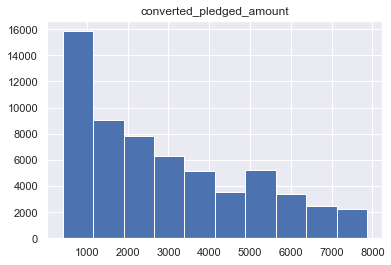

In [109]:
cleaned_df.hist(column='converted_pledged_amount')

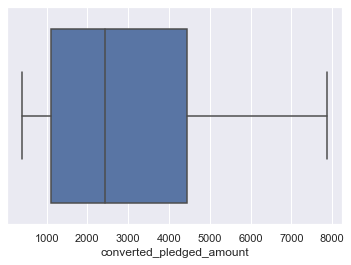

In [110]:
sns.boxplot(x=cleaned_df['converted_pledged_amount'])

In [111]:
#reset index
cleaned_df.reset_index(drop=True,inplace=True)

### f) Natural Language Processing

##### Clean the first row to check

In [112]:
#create 'text' variable of every blurb description
text = pd.DataFrame(cleaned_df['blurb'])

#lets clean the first blurb as a first step
text['blurb'][0]

'Educating my community about self-sufficiency and building basics through constructing a tiny house.'

In [113]:
#only keep letters and replace other symbols with a white space in the first blurb
blurb = re.sub('[^a-zA-Z]', ' ', text['blurb'][0])

#change letters to lower-case
blurb = blurb.lower()   

#split the first blurb which is a string into list
blurb = blurb.split()

#for loop to remove stop-words and to do lemmatization
wn = WordNetLemmatizer()
blurb = [wn.lemmatize(word) for word in blurb if not word in set(stopwords.words('english'))]

#join blurb back into a string from a list
blurb = ' '.join(blurb)

blurb

'educating community self sufficiency building basic constructing tiny house'

### Clean the entire 'blurb' column

In [114]:
length = len(pd.DataFrame(cleaned_df['blurb']))

In [115]:
corpus = []
for i in range(0, length):
    #only keep letters and replace other symbols with a white space in the first blurb
    blurb = re.sub('[^a-zA-Z]', ' ', text['blurb'][i])

    #change letters to lower-case
    blurb = blurb.lower()   
    #split
    blurb = blurb.split()
    #for loop to remove stop-words and to do stemming
    wn = WordNetLemmatizer()
    blurb = [wn.lemmatize(word) for word in blurb if not word in set(stopwords.words('english'))]
    #join blurb back into a string from a list
    blurb = ' '.join(blurb)
    corpus.append(blurb)

In [116]:
#write corpus array into a dataframe and save it to a csv for importing into the Step 4 (Classification)
corpus_df = pd.DataFrame(corpus, columns = ['blurb'])
corpus_df.head()

,blurb
0,educating community self sufficiency building ...
1,thema literary society proposes publish one th...
2,collection hand lettered thing say idea sentim...
3,genesis follows mother son live together forei...
4,help u bring art culture ballet community cent...


### End of Step 3

In [117]:
#write corpus_df to a .csv
corpus_df.to_csv('corpus_data.csv')

In [118]:
#write cleaned cleaned_df to a .csv
cleaned_df.to_csv('cleaned2_data.csv')